# **Zomato Price Prediction For Two**
**Project Type - Supervised learning (Regression)**

 **Contribution - Individual**

 **Name - Vikash Kumar Diwakar**

# **Project Workflow:**

* **Importing Neccessary Libraries**

* **Data Wrangling**

      1. Gathering Data
          - CSV and others files
          - APIs
          - Web Scraping
          - Databases
      2. Assessing Data
      3. Cleaning Data

* **EDA and Features Engineering on features**

* **Features Transformation and selection**

* **Remove Multicollinearity**

* **model implementation and pre-processing**

      1. Train, Test and Split
      2. preprocessing using column-transformer
      3. make best pipeline
          
* **Fitting the regression models and HyperParameter Tuning**

* **Final selection of the model**

* **Conclusion**

# **Problem Statement**
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.


This problem statement contains two datasets- `Zomato.csv` and `country_code.csv`.
Country_code.csv contains two variables:

`Country code`

`Country name`

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the
following variables:

• `Restaurant Id`: Unique id of every restaurant across various cities of the world.

• `Restaurant Name`: Name of the restaurant

• `Country Code`: Country in which restaurant is located

• `City`: City in which restaurant is located

• `Address`: Address of the restaurant

• `Locality`: Location in the city

• `Locality Verbose`: Detailed description of the locality

• `Longitude`: Longitude coordinate of the restaurant&#39;s location

• `Latitude`: Latitude coordinate of the restaurant&#39;s location

• `Cuisines`: Cuisines offered by the restaurant

• `Average Cost for two`: Cost for two people in different currencies

• `Currency`: Currency of the country

• `Has Table booking`: yes/no

• `Has Online delivery`: yes/ no

• `Is delivering`: yes/ no

• `Switch to order menu`: yes/no

• `Price range`: range of price of food

• `Aggregate Rating`: Average rating out of 5

• `Rating color`: depending upon the average rating color

• `Rating text`: text on the basis of rating of rating

• `Votes`: Number of ratings casted by people


In [58]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [59]:
# creating dataframe for country code
df_1=pd.read_excel('/content/Country-Code.xlsx')

# reading first 5 rows
df_1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [60]:
# checking the number of rows and columns in df_1
df_1.shape
print('The number of rows are :',df_1.shape[0])
print('The number of columns are :',df_1.shape[1])

The number of rows are : 15
The number of columns are : 2


* **The Number Of rows are only 15, which means there must been only 15 unique countries in the dataframe.**

In [61]:
# creting dataframe for zomatao
df_2=pd.read_csv('/content/zomato.csv',encoding='ISO-8859-1')

# reading first 5 rows
df_2.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [62]:
# checking number of rows and columns
df_2.shape
print('The number of rows are :',df_2.shape[0])
print('The number of columns are :',df_2.shape[1])

The number of rows are : 9551
The number of columns are : 21


## **Merging both datasets to create on dataframe**

In [63]:
# merging both datasets
df=pd.merge(df_1,df_2,on='Country Code',how='left')

In [64]:
# checking numbers of rows and columns
df.shape
print('The number of rows in new datframe are :',df.shape[0])
print('The number of columns in new datframe are :',df.shape[1])

The number of rows in new datframe are : 9551
The number of columns in new datframe are : 22


In [65]:
# lets view first 5 rows
df.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [66]:
# viewing each column names
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


In [68]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [69]:
df.duplicated().sum()

0

In [70]:
# checking the rows having cuisene null values
df[df['Cuisines'].isnull()]

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9119,216,United States,17284105,Cookie Shoppe,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
9122,216,United States,17284211,Pearly's Famous Country Cookng,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
9129,216,United States,17284158,Jimmie's Hot Dogs,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160
9323,216,United States,17374552,Corkscrew Cafe,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,...,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209
9347,216,United States,17501439,Dovetail,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,...,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102
9363,216,United States,17606621,HI Lite Bar & Lounge,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,11
9384,216,United States,17059060,Hillstone,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,...,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158
9430,216,United States,17142698,Leonard's Bakery,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,...,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707
9467,216,United States,17616465,Tybee Island Social Club,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309


In [71]:
# dropping the null columns
df=df.dropna(subset='Cuisines')

In [72]:
df.shape


(9542, 22)

In [73]:
df=df.drop(columns=['Country Code','Restaurant ID','Address','Locality Verbose','Currency'])

In [74]:
df.sample()

,Country,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
8966,Turkey,Draft Gastro Pub,ÛÁstanbul,Caddebostan,29.074116,40.963935,Bar Food,130,No,No,No,No,4,4.9,Dark Green,Excellent,522


In [75]:
df['Country'].value_counts()

Country
India             8652
United States      425
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

* **Will be dropping all country except `India` because of the price range factor. All other countries have different currencies and to covert them into one currency is not possible and its time consuming infact the counts of other counties are also very low as compared.**

## **`Country`**

In [76]:
df_new=df[df['Country']=='India']

In [77]:
df_new.sample(2)

,Country,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
4327,India,South Indian & Chinese Fast Food,New Delhi,Laxmi Nagar,77.277773,28.630201,"South Indian, Chinese, Fast Food",350,No,No,No,No,1,0.0,White,Not rated,0
5570,India,Pudding & Pie,New Delhi,Paschim Vihar,77.092345,28.665173,"Bakery, Desserts, Fast Food",450,No,No,No,No,1,2.7,Orange,Average,16


In [78]:
df_new['Country'].value_counts()

Country
India    8652
Name: count, dtype: int64

## **City**

In [79]:
df_new['City'].value_counts()

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: count, dtype: int64

## **`Cuisines`**

In [80]:
df_new['Cuisines'].value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Fast Food                                                348
Chinese                                                  340
North Indian, Mughlai                                    334
                                                        ... 
Chinese, Japanese, Thai, Malaysian, Vietnamese, Asian      1
North Indian, Street Food, Mughlai                         1
Seafood, South Indian, Andhra, Hyderabadi, Goan            1
Chinese, Fast Food, North Indian, South Indian             1
American, North Indian, Thai, Continental                  1
Name: count, Length: 1392, dtype: int64

In [81]:
df_new.sample()

,Country,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
4511,India,Go Foodie,New Delhi,Malviya Nagar,77.20763,28.531495,"North Indian, Chinese",500,No,No,No,No,2,3.3,Orange,Average,105


# **Feature Engineering**

## **`Price range`**

In [82]:
# checking unique values of price range
df_new['Price range'].value_counts()

Price range
1    4295
2    2858
3    1111
4     388
Name: count, dtype: int64

* **We can clearly inferr that 4 reffers to expensive range because its values are less similarly 3 being moderate so on and so forth.**

## **Creating Catagories for price range**

In [83]:
def price_range(i):
  '''it returns the values of based on price range
  '''
  if i==1:
      return 'Cheap'
  elif i==2:
      return 'Moderate'
  elif i==3:
      return 'Expensive'
  else:
      return 'Very Expensive'

In [84]:
df_new['Price_category']=df_new['Price range'].apply(price_range)

In [85]:
df_new.sample(5)

,Country,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Price_category
259,India,Suruchi,Faridabad,"Crown Interiorz Mall, Sector 35, Faridabad",77.307448,28.470132,"North Indian, South Indian, Gujarati, Rajasthani",700,No,No,No,No,2,3.4,Orange,Average,233,Moderate
1431,India,Karari Kurry,Gurgaon,Sohna Road,77.042537,28.412410,"North Indian, Chinese, Fast Food",600,No,Yes,No,No,2,3.4,Orange,Average,51,Moderate
2536,India,Suvidha Vegetarian,New Delhi,Daryaganj,77.239842,28.643740,North Indian,350,No,No,No,No,1,3.6,Yellow,Good,88,Cheap
1520,India,Nuterro,Gurgaon,Sushant Lok,77.075199,28.470873,"Healthy Food, Continental, Juices, Beverages, ...",600,No,Yes,No,No,2,4.0,Green,Very Good,101,Moderate
4951,India,Chaap Chaska,New Delhi,Mukherjee Nagar,77.209065,28.710351,"North Indian, Mughlai",400,No,No,No,No,1,0.0,White,Not rated,1,Cheap


## **`Aggregate rating`**

In [86]:
df_new['Aggregate rating'].value_counts()

Aggregate rating
0.0    2139
3.1     511
3.2     510
3.4     477
3.3     472
3.0     465
3.5     454
3.6     411
2.9     380
3.7     363
3.8     336
2.8     314
3.9     283
2.7     250
4.0     193
2.6     190
4.1     185
4.2     140
2.5     109
4.3     100
2.4      83
4.4      74
2.3      46
4.5      37
4.6      35
2.2      26
4.9      19
4.7      16
2.1      15
4.8       9
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

* **Clearly there are `2139` restaurants having `0` rating or the customers has not given rating.**
* **We need to fill the null values with either `mean` or `median`, depednding upon the skewness of the data.**
* **Furter we need to detect outliers and treat them accordingly in future steps.**

## **`Rating Color` Vs `Rating Text`**

In [87]:
df_new['Rating color'].value_counts()

Rating color
Orange        3678
White         2139
Yellow        1847
Green          692
Red            180
Dark Green     116
Name: count, dtype: int64

In [88]:
df_new['Rating text'].value_counts()

Rating text
Average      3678
Not rated    2139
Good         1847
Very Good     692
Poor          180
Excellent     116
Name: count, dtype: int64

* **Successfuly found the realtion between `Rating color` and `Rating text`.**
* **`Rating color` is not important because it will create `multicollinearity` with Rating text column and based on color our model can't predict the price so only text column would be enough.**

* **`0` Rating is very large.**
* **`Mean` is heavily affected by the outliers/Extreme value(0 here), `Meadian`
  can be used to impute the null values.**

In [89]:
median_=df_new[df_new['Aggregate rating']!=0.0]['Aggregate rating'].median()
mean_=df_new[df_new['Aggregate rating']!=0.0]['Aggregate rating'].mean()
print(mean_)
print(median_)

3.3520343927529557
3.3


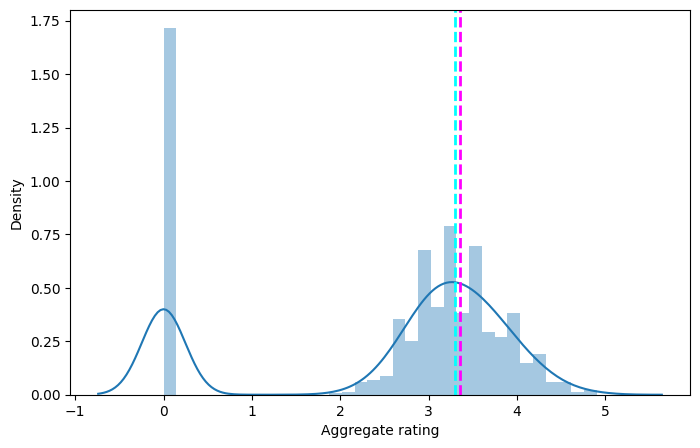

In [90]:
plt.figure(figsize=(8,5))
sns.distplot(df_new['Aggregate rating'],kde=True)
plt.axvline(mean_,color='magenta',linestyle='dashed',linewidth=2)
plt.axvline(median_,color='cyan',linestyle='dashed',linewidth=2)
plt.show()

In [91]:
df_new['Aggregate rating']=df_new['Aggregate rating'].replace(0.0,median_)


In [92]:
df_new['Aggregate rating'].value_counts()

Aggregate rating
3.3    2611
3.1     511
3.2     510
3.4     477
3.0     465
3.5     454
3.6     411
2.9     380
3.7     363
3.8     336
2.8     314
3.9     283
2.7     250
4.0     193
2.6     190
4.1     185
4.2     140
2.5     109
4.3     100
2.4      83
4.4      74
2.3      46
4.5      37
4.6      35
2.2      26
4.9      19
4.7      16
2.1      15
4.8       9
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

* **Scuccessfuly replaced `0` with median rating**

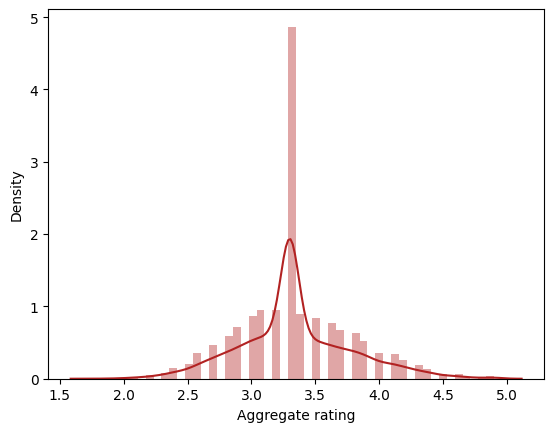

In [93]:
sns.distplot(df_new['Aggregate rating'],kde=True,color='firebrick');

In [94]:
df_new.rename(columns={'Aggregate rating':'Aggregate_rating'},inplace=True)

In [95]:
df_new.sample(2)

,Country,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate_rating,Rating color,Rating text,Votes,Price_category
1721,India,Meraaki Kitchen,Jaipur,Civil Lines,75.783013,26.910262,"Modern Indian, Asian",1500,No,No,No,No,3,3.9,Yellow,Good,67,Expensive
3227,India,Lucky Corner Shop,New Delhi,GTB Nagar,77.204819,28.696101,Fast Food,200,No,No,No,No,1,3.3,White,Not rated,0,Cheap


## **`Votes`**

In [96]:
df_new.shape

(8652, 18)

In [97]:
df_new['Votes'].value_counts()

Votes
0       1093
1        481
2        323
3        242
4        207
        ... 
1515       1
1295       1
536        1
3244       1
479        1
Name: count, Length: 871, dtype: int64

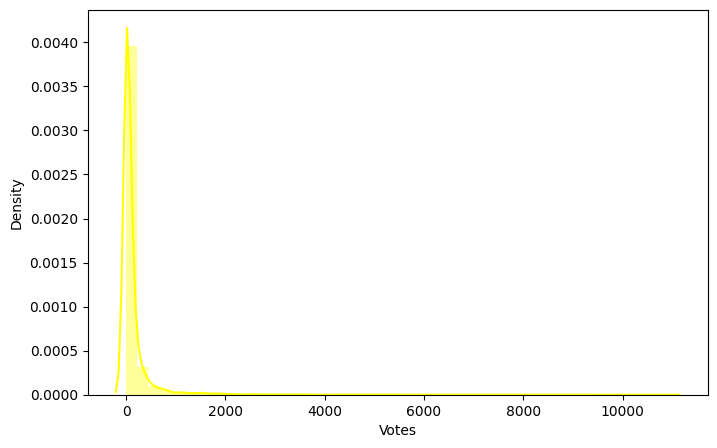

In [98]:
plt.figure(figsize=(8,5))
sns.distplot(df_new['Votes'],kde=True,color='yellow')
plt.show()

In [99]:
len(df_new[df_new['Votes']>2200])

66

In [100]:
df_new.drop(df_new[df_new['Votes']>2200].index,inplace=True)

In [101]:
df_new.shape

(8586, 18)

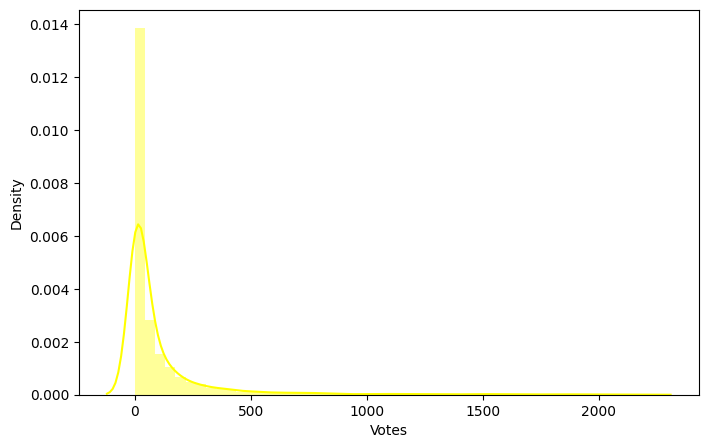

In [102]:
plt.figure(figsize=(8,5))
sns.distplot(df_new['Votes'],kde=True,color='yellow')
plt.show()

In [103]:
# replacing 0 with null values
df_new['Votes']=df_new['Votes'].replace(0,np.nan)

# filling nan values with mean/median
df_new['Votes'].fillna(int(df_new['Votes'].median()),axis=0,inplace=True)
int(df_new['Votes'].median())

34

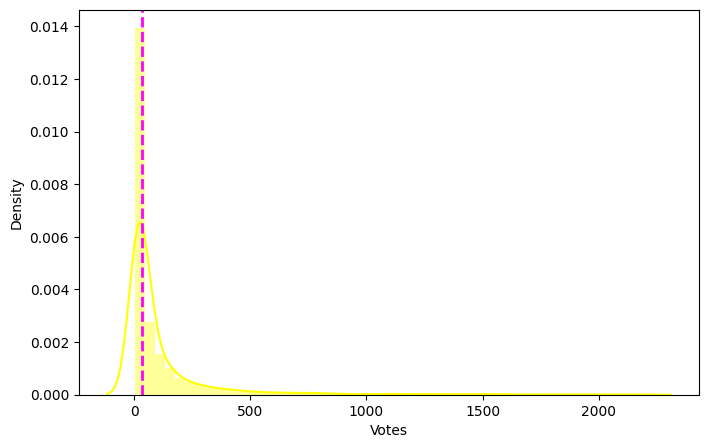

In [104]:
plt.figure(figsize=(8,5))
sns.distplot(df_new['Votes'],kde=True,color='yellow')
plt.axvline(df_new['Votes'].median(),color='magenta',linestyle='dashed',linewidth=2)
# plt.axvline(median_,color='cyan',linestyle='dashed',linewidth=2)
plt.show()

In [105]:
df_new["Votes"]=df_new["Votes"].astype('int64')

In [106]:
df_new["Votes"].value_counts()

Votes
34      1135
1        481
2        323
3        242
4        207
        ... 
499        1
1096       1
1300       1
671        1
479        1
Name: count, Length: 805, dtype: int64

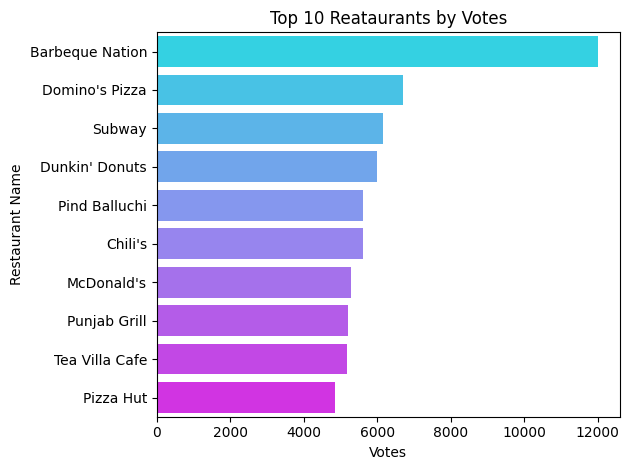

In [107]:
top_10_reataurants=df_new.groupby('Restaurant Name').Votes.sum().nlargest(10)
top_10_reataurants=top_10_reataurants.reset_index()


sns.barplot(x='Votes', y='Restaurant Name', data=top_10_reataurants,palette='cool')
plt.title('Top 10 Reataurants by Votes')


plt.tight_layout()
plt.show()


# **Featues Selection**

In [108]:
df_new.sample(2)

,Country,Restaurant Name,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate_rating,Rating color,Rating text,Votes,Price_category
6217,India,The Chinese & Thai Restaurant,New Delhi,Safdarjung,77.192898,28.561531,"Chinese, Thai",300,No,No,No,No,1,3.3,White,Not rated,1,Cheap
1361,India,Sai-Yo!,Gurgaon,Sector 56,77.100152,28.428393,"North Indian, Chinese",650,No,Yes,No,No,2,3.1,Orange,Average,37,Moderate


In [109]:
# dropping irrelevant columns
df_new.drop(labels=['Country','Restaurant Name','City','Locality','Cuisines'],axis=1,inplace=True)

In [110]:
df_new.sample(1)

,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate_rating,Rating color,Rating text,Votes,Price_category
844,77.095432,28.460444,700,No,Yes,No,No,2,4.1,Green,Very Good,84,Moderate


In [111]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8586 entries, 0 to 8651
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Longitude             8586 non-null   float64
 1   Latitude              8586 non-null   float64
 2   Average Cost for two  8586 non-null   int64  
 3   Has Table booking     8586 non-null   object 
 4   Has Online delivery   8586 non-null   object 
 5   Is delivering now     8586 non-null   object 
 6   Switch to order menu  8586 non-null   object 
 7   Price range           8586 non-null   int64  
 8   Aggregate_rating      8586 non-null   float64
 9   Rating color          8586 non-null   object 
 10  Rating text           8586 non-null   object 
 11  Votes                 8586 non-null   int64  
 12  Price_category        8586 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 939.1+ KB


In [112]:
df_new=df_new.astype({'Has Table booking':'category',
                      'Has Online delivery':'category',
                      'Is delivering now':'category',
                      'Switch to order menu':'category',
                      'Rating color':'category',
                      'Rating text':'category',
                      'Price_category':'category'})

In [113]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8586 entries, 0 to 8651
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Longitude             8586 non-null   float64 
 1   Latitude              8586 non-null   float64 
 2   Average Cost for two  8586 non-null   int64   
 3   Has Table booking     8586 non-null   category
 4   Has Online delivery   8586 non-null   category
 5   Is delivering now     8586 non-null   category
 6   Switch to order menu  8586 non-null   category
 7   Price range           8586 non-null   int64   
 8   Aggregate_rating      8586 non-null   float64 
 9   Rating color          8586 non-null   category
 10  Rating text           8586 non-null   category
 11  Votes                 8586 non-null   int64   
 12  Price_category        8586 non-null   category
dtypes: category(7), float64(3), int64(3)
memory usage: 529.3 KB


## **Lets View Correlation**

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a new DataFrame with only numeric columns
numeric_cols = df_new.select_dtypes(include=['int64', 'int32', 'float32', 'float64']).drop(['Average Cost for two'], axis=1)

# calculate VIF for each column
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]
vif["features"] = numeric_cols.columns

# print the results
vif

,VIF Factor,features
0,145.464693,Longitude
1,125.187637,Latitude
2,6.234868,Price range
3,17.958003,Aggregate_rating
4,1.510016,Votes


<Axes: xlabel='Longitude', ylabel='Density'>

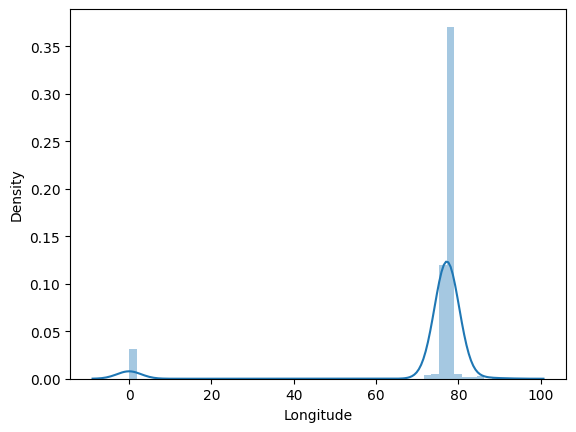

In [115]:
sns.distplot(df_new['Longitude'])

# **Model Implementation and Preprocessing**

# **`Train Test Split`**

In [116]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_new['Average Cost for two'] = pt.fit_transform(pd.DataFrame(df_new['Average Cost for two']))

In [117]:

# split the Dataset into independent(x) and dependent(y) Dataset

X = df_new.drop(columns=['Average Cost for two'])
y = df_new['Average Cost for two']

In [118]:
X

,Longitude,Latitude,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate_rating,Rating color,Rating text,Votes,Price_category
0,78.011544,27.161661,No,No,No,No,3,3.9,Yellow,Good,140,Expensive
1,0.000000,0.000000,No,No,No,No,2,3.5,Yellow,Good,71,Moderate
2,78.011608,27.160832,No,No,No,No,2,3.6,Yellow,Good,94,Moderate
3,77.998092,27.195928,No,No,No,No,2,4.0,Green,Very Good,87,Moderate
4,78.007553,27.201725,No,No,No,No,3,4.2,Green,Very Good,177,Expensive
...,...,...,...,...,...,...,...,...,...,...,...,...
8647,83.361377,17.764287,No,No,No,No,2,3.6,Yellow,Good,193,Moderate
8648,0.000000,0.000000,No,No,No,No,2,3.7,Yellow,Good,85,Moderate
8649,83.315281,17.719539,No,No,No,No,2,4.3,Green,Very Good,172,Moderate
8650,83.336840,17.721182,No,No,No,No,4,3.8,Yellow,Good,74,Very Expensive


In [119]:
y

0       0.799758
1       0.535986
2       0.086484
3      -0.206345
4       1.023046
          ...   
8647    0.328859
8648   -0.206345
8649    0.328859
8650    1.590162
8651    1.492642
Name: Average Cost for two, Length: 8586, dtype: float64

In [120]:
# calling train_test_split() to get the training and testing data.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# split sizes
print(X_train.shape)
print(X_test.shape)

(6868, 12)
(1718, 12)


In [121]:
X.sample(1)

,Longitude,Latitude,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate_rating,Rating color,Rating text,Votes,Price_category
517,73.75575,15.576683,No,No,No,No,3,4.5,Dark Green,Excellent,280,Expensive


# **Data pre-processing using ColumnTransformer for make Pipeline**

In [122]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# using column transformer to make step1 of scaling, encoding, function transformer, imputer etc to build pipelines.
step1 = ColumnTransformer(transformers=[
    ('col_tnf', StandardScaler(),[0,1,7,10]),
    ('col_tnf1', PowerTransformer(),[0,1,7,10]),
    ('col_tnf2', OneHotEncoder(sparse=False, drop='first'),[2,3,4,5]),
    ('col_tnf3', OrdinalEncoder(categories=[['White','Red','Orange','Yellow','Green','Dark Green']]),[8]),
    ('col_tnf4', OrdinalEncoder(categories=[['Not rated','Poor','Average','Good','Very Good','Excellent']]),[9]),
    ('col_tnf5', OrdinalEncoder(categories=[['Cheap','Moderate','Expensive','Very Expensive']]),[11])
],remainder='passthrough')



# display pipeline

from sklearn import set_config
set_config(display='diagram')

In [123]:
df_new['Price_category'].value_counts()

Price_category
Cheap             4292
Moderate          2841
Expensive         1077
Very Expensive     376
Name: count, dtype: int64

# **`Linear Regression`**

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# apply LinearRegression algorithm as step2

step2 = LinearRegression()


# make pipeline
pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe1.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe1.predict(X_train)
y_pred = pipe1.predict(X_test)

# display pipeline diagram
display(pipe1)

# LinearRegression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3, 4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['White',
                                                                              'Red',
                                                                              'Orange',
                                                                              'Yellow',
                                                                              'Green',
                                                                              'Dark '
                                                                              'Green']]),
                                                  [8]),
                                                 ('col_tnf4',
                                                  OrdinalEncoder(categories=[['Not '
                                                                              'rated',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Excellent']]),
                                                  [9]),
                                                 ('col_tnf5',
                                                  OrdinalEncoder(categories=[['Cheap',
                                                                              'Moderate',
                                                                              'Expensive',
                                                                              'Very '
                                                                              'Expensive']]),
                                                  [11])])),
                ('step2', LinearRegression())])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7765425911538364
Adjusted R2 score 0.7761514184468847


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7704016808866282
Adjusted R2 score 0.7687857396377364


The performance metrics
-----------------------------------------
MAE 0.33617407276439065
MSE 0.22386978014573858
RMSE 0.47314879281864236


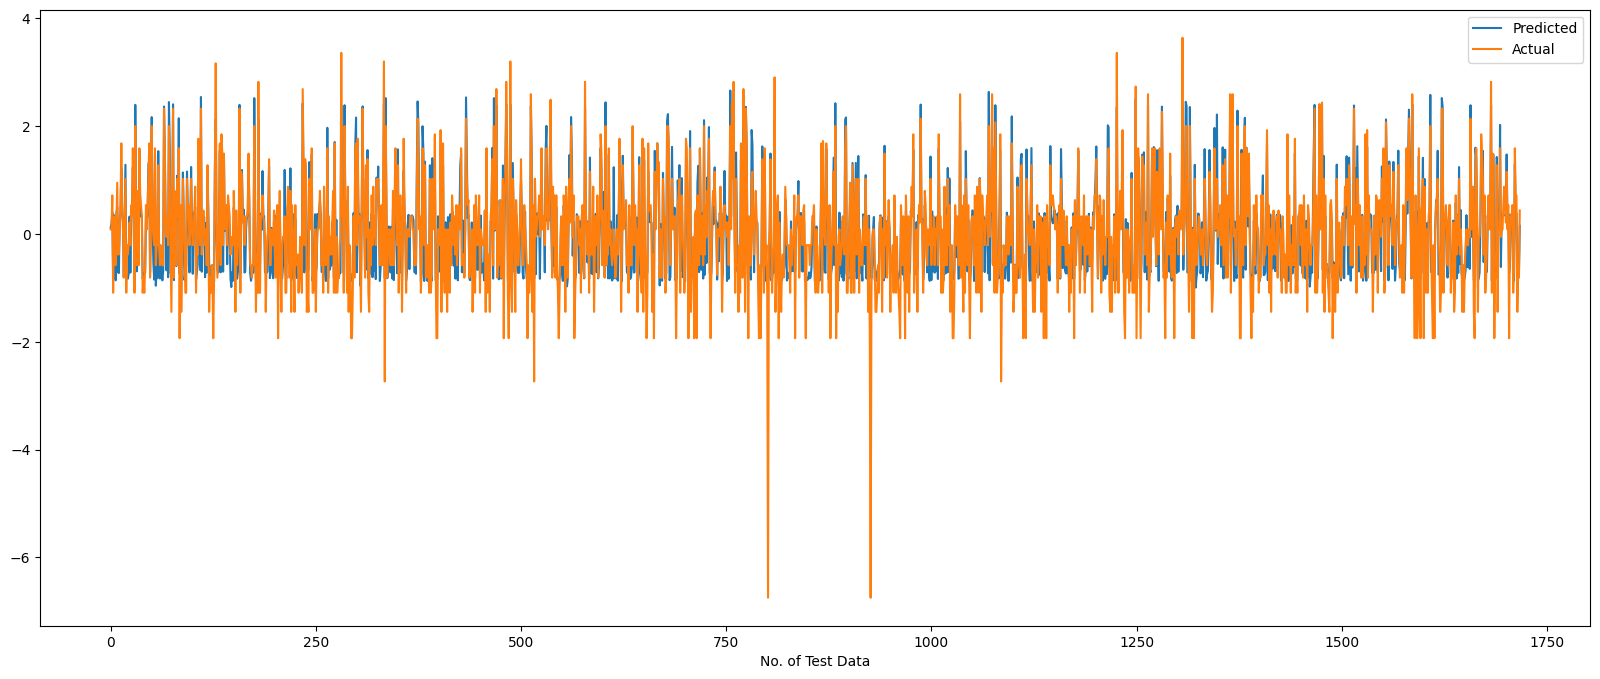

In [125]:
# Plot the figure
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`Ridge Regression(L2) with hyperparameter tuning`**

In [126]:
# apply RidgeRegression algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,3,5,8,12,15,18,21,25]}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

Reg_ridge = GridSearchCV(Ridge(), parameters, cv=10)

step2 = Reg_ridge

# make pipeline
pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe2.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe2.predict(X_train)
y_pred = pipe2.predict(X_test)

# display pipeline diagram
display(pipe2)

# Ridge Regression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", Reg_ridge.best_params_)
print('cross-validation score', Reg_ridge.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3, 4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['White',
                                                                              'Red',
                                                                              'Orange',
                                                                              'Yellow',
                                                                              'Green',
                                                                              'Dark '
                                                                              'Green']]),
                                                  [8]),
                                                 ('col_tnf4',
                                                  OrdinalEncoder(categories=[['Not '
                                                                              'rated',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Excellent']]),
                                                  [9]),
                                                 ('col_tnf5',
                                                  OrdinalEncoder(categories=[['Cheap',
                                                                              'Moderate',
                                                                              'Expensive',
                                                                              'Very '
                                                                              'Expensive']]),
                                                  [11])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=Ridge(),
                              param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1, 1,
                                                    3, 5, 8, 12, 15, 18, 21,
                                                    25]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7764799238149382
Adjusted R2 score 0.7760886414058615


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7707379397298595
Adjusted R2 score 0.7691243651121225


Cross-validation score and best params
-----------------------------------------
The best parameters is {'alpha': 18}
cross-validation score 0.7756052112277848


The performance metrics
-----------------------------------------
MAE 0.33584516549150545
MSE 0.2235419110498456
RMSE 0.47280219019146436


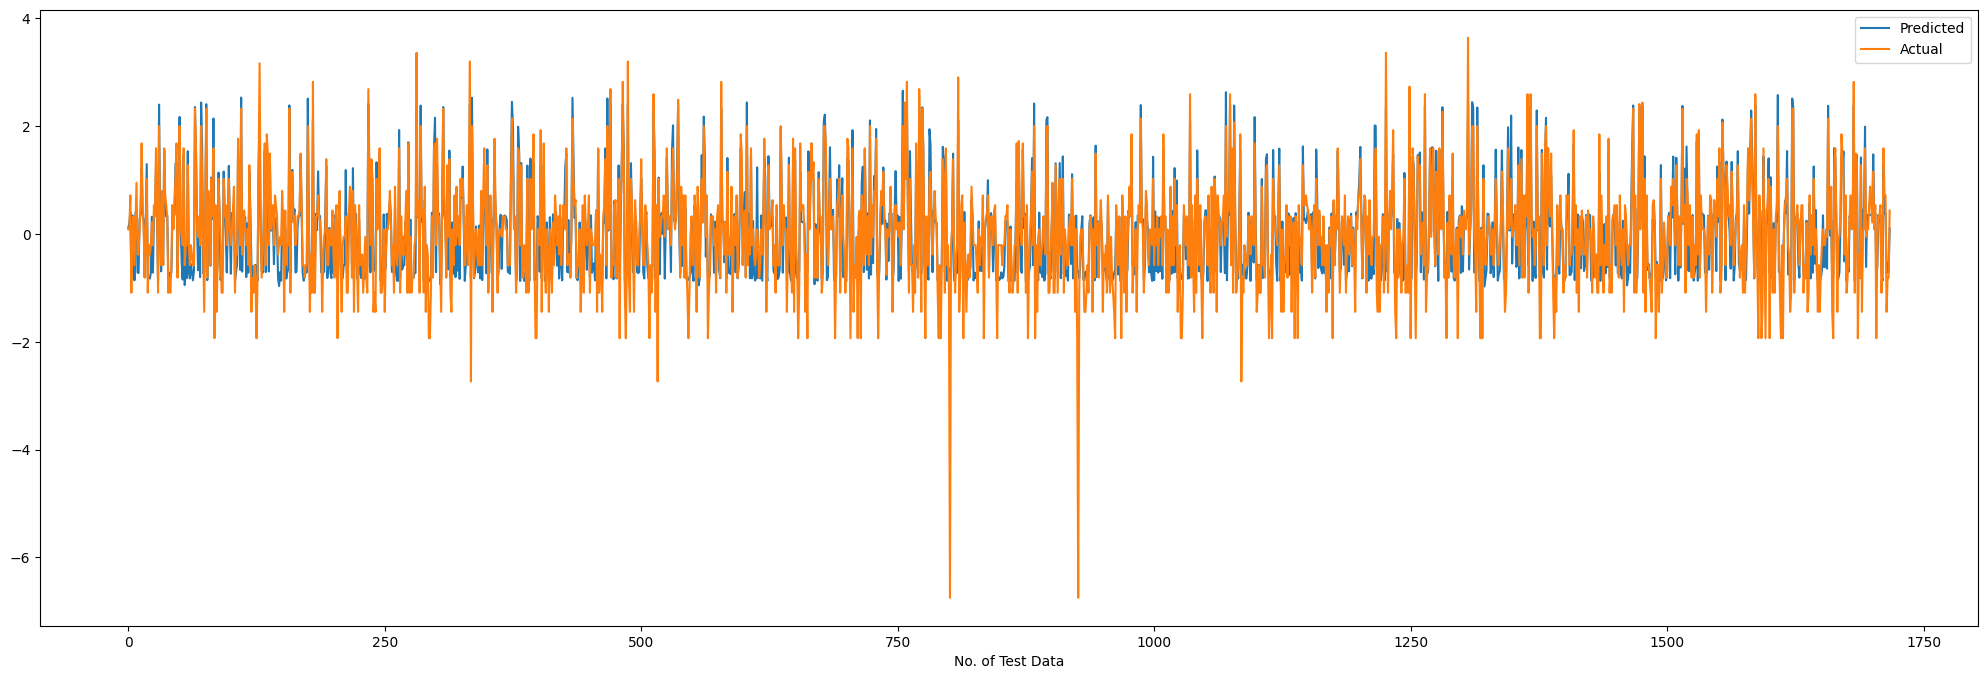

In [127]:
# Plot the figure
plt.figure(figsize=(25,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`Lasso Regression(L1) with hyperparameter tuning`**

In [128]:
# apply LassoRegression algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,8,12,15,18,21,25]}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.linear_model import Lasso

Reg_Lasso = GridSearchCV(Lasso(), parameters, cv=10)

step2 = Reg_Lasso

# make pipeline
pipe3 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe3.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe3.predict(X_train)
y_pred = pipe3.predict(X_test)

# display pipeline diagram
display(pipe3)

# Lasso Regression model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", Reg_Lasso.best_params_)
print('cross-validation score', Reg_Lasso.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3, 4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['White',
                                                                              'Red',
                                                                              'Orange',
                                                                              'Yellow',
                                                                              'Green',
                                                                              'Dark '
                                                                              'Green']]),
                                                  [8]),
                                                 ('col_tnf4',
                                                  OrdinalEncoder(categories=[['Not '
                                                                              'rated',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Excellent']]),
                                                  [9]),
                                                 ('col_tnf5',
                                                  OrdinalEncoder(categories=[['Cheap',
                                                                              'Moderate',
                                                                              'Expensive',
                                                                              'Very '
                                                                              'Expensive']]),
                                                  [11])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=Lasso(),
                              param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1, 1,
                                                    2, 3, 4, 5, 8, 12, 15, 18,
                                                    21, 25]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.776528318304506
Adjusted R2 score 0.77613712061226


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7705456242992323
Adjusted R2 score 0.7689306961418076


Cross-validation score and best params
-----------------------------------------
The best parameters is {'alpha': 0.0001}
cross-validation score 0.7756019339188166


The performance metrics
-----------------------------------------
MAE 0.33599918844079724
MSE 0.22372942815946298
RMSE 0.47300045259963863


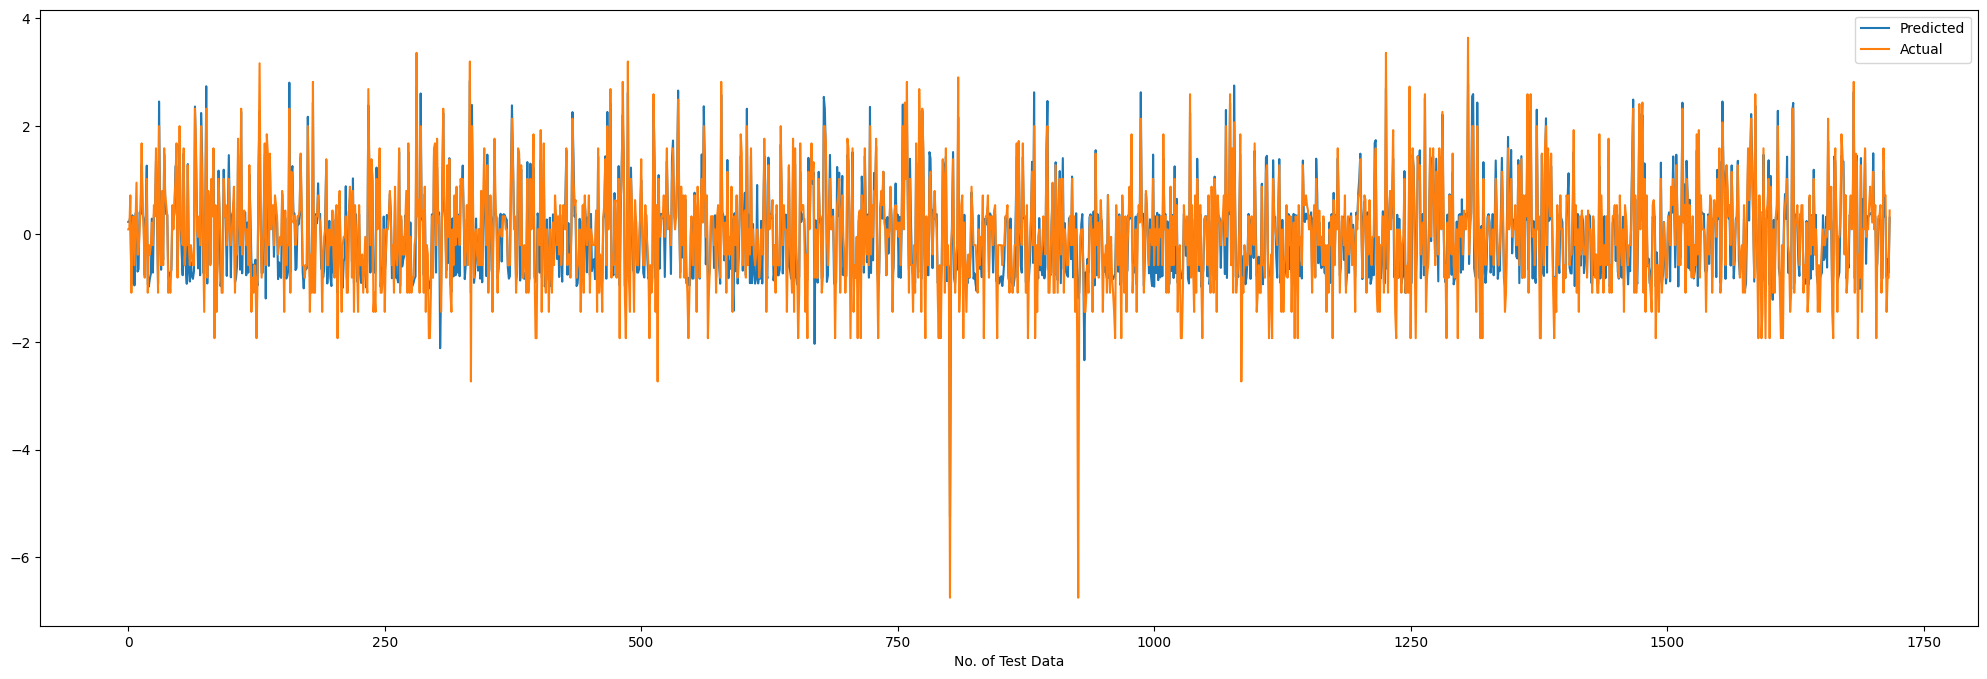

In [133]:
# Plot the figure
plt.figure(figsize=(25,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`DecisionTreeRegressor with Hyperparameter tuning`**

In [129]:
# apply DecisionTreeRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'criterion':['squared_error'],     # 'friedman_mse', 'absolute_error'
    'splitter' :['best'],              # random
    'max_depth' :[6],                  #4,5,6,7,8,9,None
    'max_features' :[1.0]              #0.25,0.50,0.75,0.85
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

dtr = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = dtr

# make pipeline
pipe4 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe4.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe4.predict(X_train)
y_pred = pipe4.predict(X_test)

# display pipeline diagram
display(pipe4)

# DecisionTreeRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", dtr.best_params_)
print('cross-validation score', dtr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3, 4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['White',
                                                                              'Red',
                                                                              'Orange',
                                                                              'Yellow',
                                                                              'Green',
                                                                              'Dark '
                                                                              'Green']]),
                                                  [8]),
                                                 ('col_tnf4',
                                                  OrdinalE...s=[['Not '
                                                                              'rated',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Excellent']]),
                                                  [9]),
                                                 ('col_tnf5',
                                                  OrdinalEncoder(categories=[['Cheap',
                                                                              'Moderate',
                                                                              'Expensive',
                                                                              'Very '
                                                                              'Expensive']]),
                                                  [11])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                              n_jobs=-1,
                              param_grid={'criterion': ['squared_error'],
                                          'max_depth': [6],
                                          'max_features': [1.0],
                                          'splitter': ['best']}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.822953696849352
Adjusted R2 score 0.822643768966375


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8030011005066137
Adjusted R2 score 0.8016145979881851


Cross-validation score and best params
-----------------------------------------
The best parameters is {'criterion': 'squared_error', 'max_depth': 6, 'max_features': 1.0, 'splitter': 'best'}
cross-validation score 0.7780937727941699


The performance metrics
-----------------------------------------
MAE 0.320670098575561
MSE 0.1920837246929494
RMSE 0.4382735728890682


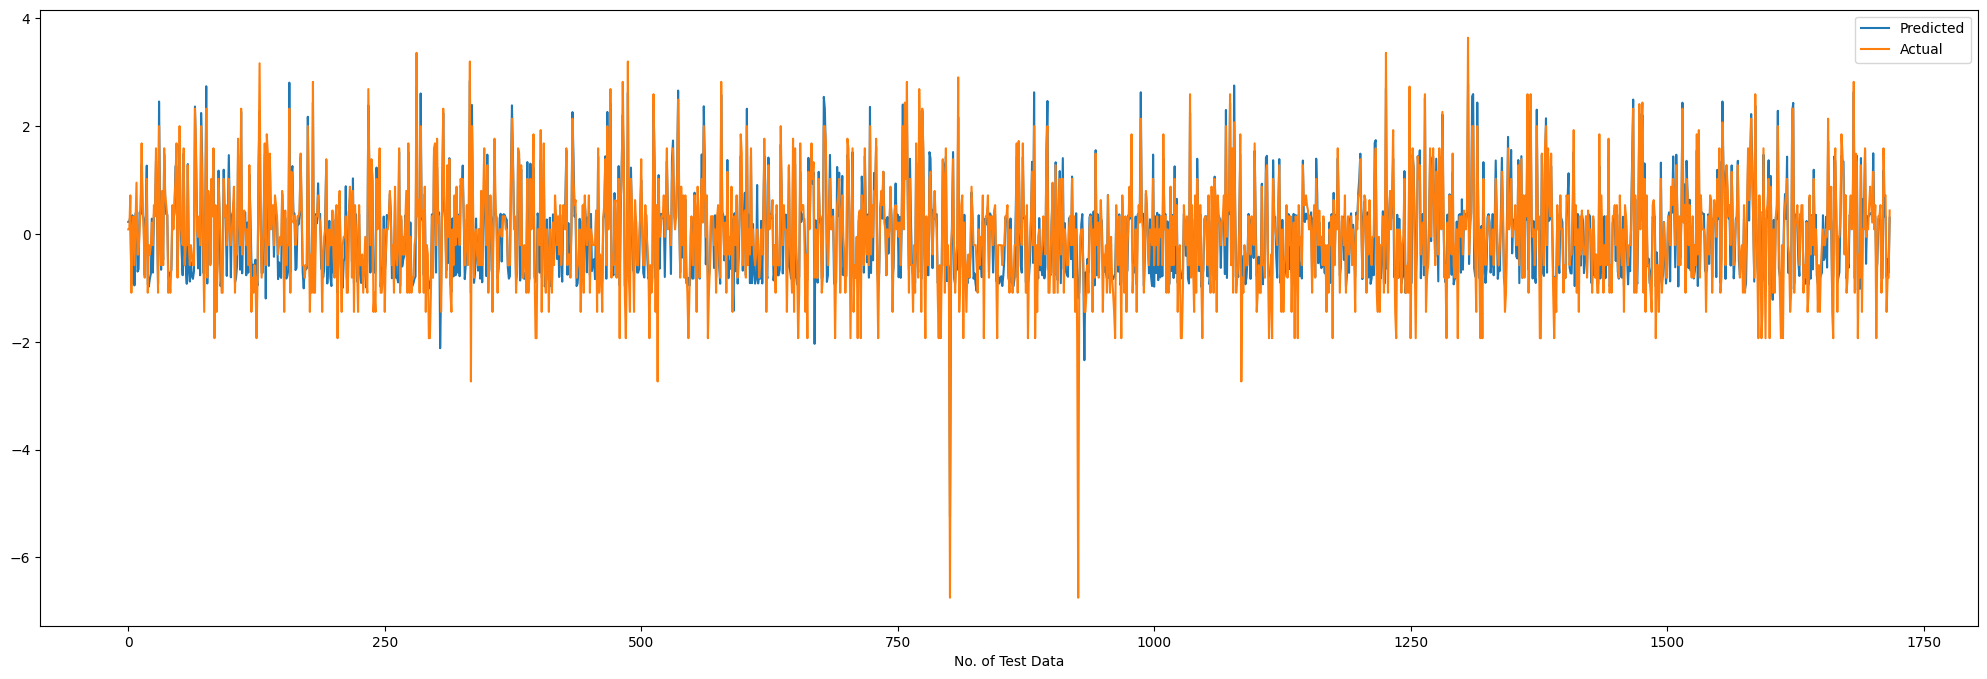

In [134]:
# Plot the figure
plt.figure(figsize=(25,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`RandomForestRegressor with hyperparameter tuninb`**

In [130]:
# apply RandomForestRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators':[58],      # 50,55,60,70,80,90,100
    'max_depth' :[6],         # 4,5,6,7,8,9,None
    'max_features' :[None],   # 'sqrt','log2'
    'max_samples' :[0.85]     # 0.40,0.50,0.60,0.70,0.75,0.85,1.0
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rfr = GridSearchCV(RandomForestRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = rfr

# make pipeline
pipe5 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe5.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe5.predict(X_train)
y_pred = pipe5.predict(X_test)

# display pipeline diagram
display(pipe5)

# RandomForestRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", rfr.best_params_)
print('cross-validation score', rfr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3, 4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['White',
                                                                              'Red',
                                                                              'Orange',
                                                                              'Yellow',
                                                                              'Green',
                                                                              'Dark '
                                                                              'Green']]),
                                                  [8]),
                                                 ('col_tnf4',
                                                  OrdinalE...ategories=[['Not '
                                                                              'rated',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Excellent']]),
                                                  [9]),
                                                 ('col_tnf5',
                                                  OrdinalEncoder(categories=[['Cheap',
                                                                              'Moderate',
                                                                              'Expensive',
                                                                              'Very '
                                                                              'Expensive']]),
                                                  [11])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=RandomForestRegressor(),
                              n_jobs=-1,
                              param_grid={'max_depth': [6],
                                          'max_features': [None],
                                          'max_samples': [0.85],
                                          'n_estimators': [58]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8277525187635955
Adjusted R2 score 0.8274509914441445


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8045777065947812
Adjusted R2 score 0.8032023004241873


Cross-validation score and best params
-----------------------------------------
The best parameters is {'max_depth': 6, 'max_features': None, 'max_samples': 0.85, 'n_estimators': 58}
cross-validation score 0.8018343201969269


The performance metrics
-----------------------------------------
MAE 0.3195989402479786
MSE 0.19054645534490933
RMSE 0.43651627156946776


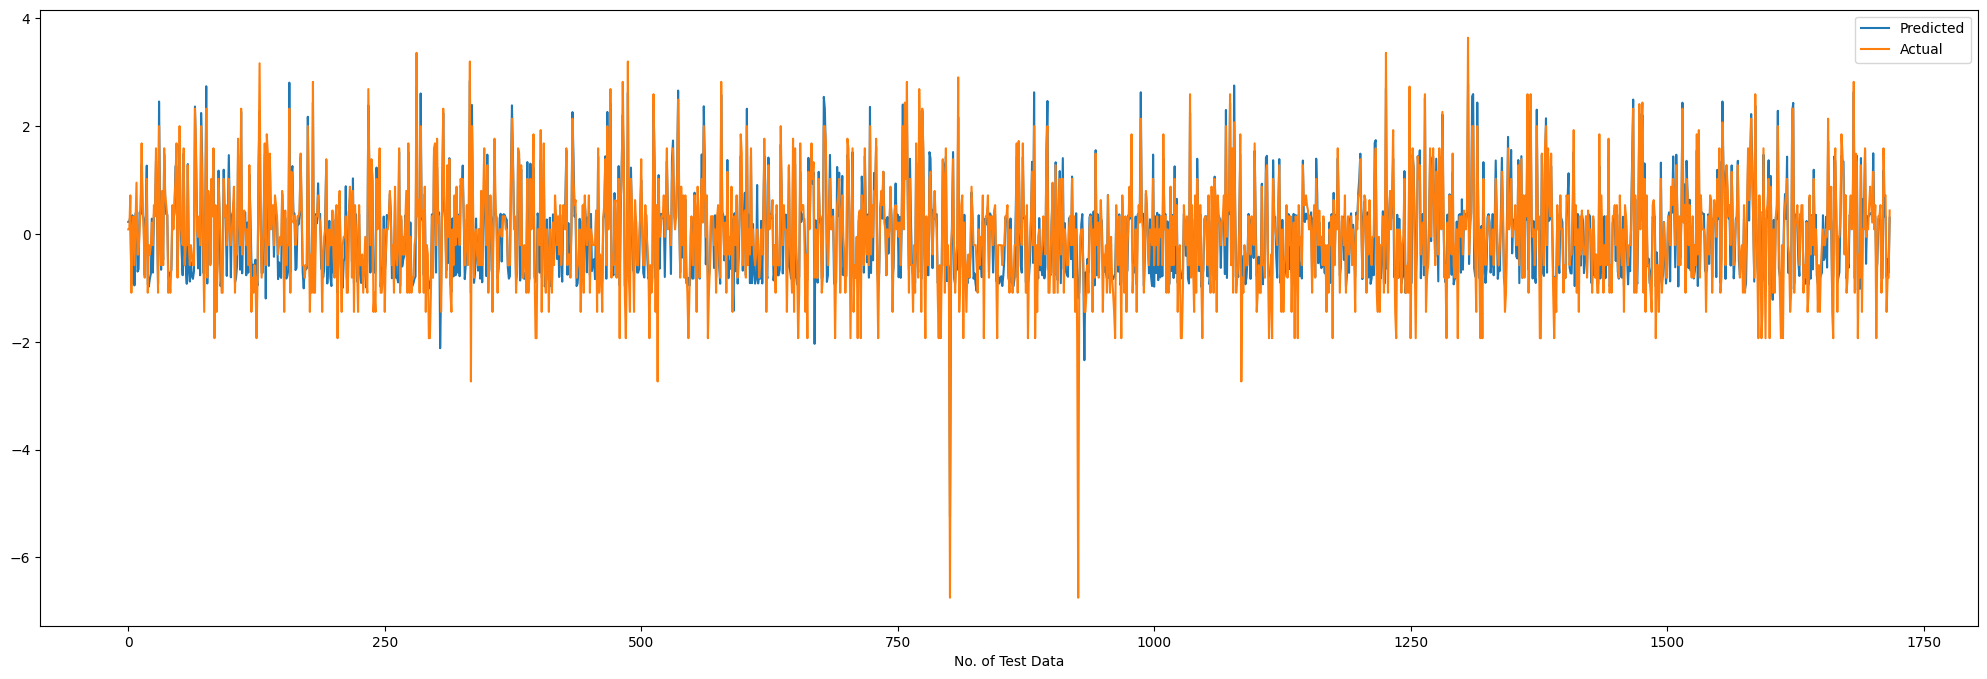

In [135]:
# Plot the figure
plt.figure(figsize=(25,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`AdaBoostRegressor with hyperparameter tuning`**

In [131]:
# apply AdaBoostRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators' :[200],                         # 50,80,120,160,180,200,220,240
    'learning_rate' :[0.01],                       # 0.0001,0.001,0.01,0.1,1
    'loss' :['linear']                             # 'linear', 'square', 'exponential'
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor

abr = GridSearchCV(AdaBoostRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = abr

# make pipeline
pipe6 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe6.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe6.predict(X_train)
y_pred = pipe6.predict(X_test)

# display pipeline diagram
display(pipe6)

# AdaBoostRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", abr.best_params_)
print('cross-validation score', abr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3, 4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['White',
                                                                              'Red',
                                                                              'Orange',
                                                                              'Yellow',
                                                                              'Green',
                                                                              'Dark '
                                                                              'Green']]),
                                                  [8]),
                                                 ('col_tnf4',
                                                  OrdinalEncoder(categories=[['Not '
                                                                              'rated',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Excellent']]),
                                                  [9]),
                                                 ('col_tnf5',
                                                  OrdinalEncoder(categories=[['Cheap',
                                                                              'Moderate',
                                                                              'Expensive',
                                                                              'Very '
                                                                              'Expensive']]),
                                                  [11])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=AdaBoostRegressor(), n_jobs=-1,
                              param_grid={'learning_rate': [0.01],
                                          'loss': ['linear'],
                                          'n_estimators': [200]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7940161751855109
Adjusted R2 score 0.793655590809468


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.7788010581648606
Adjusted R2 score 0.7772442327677804


Cross-validation score and best params
-----------------------------------------
The best parameters is {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 200}
cross-validation score 0.784738211275525


The performance metrics
-----------------------------------------
MAE 0.33698285179201465
MSE 0.21567996955870852
RMSE 0.4644135759844974


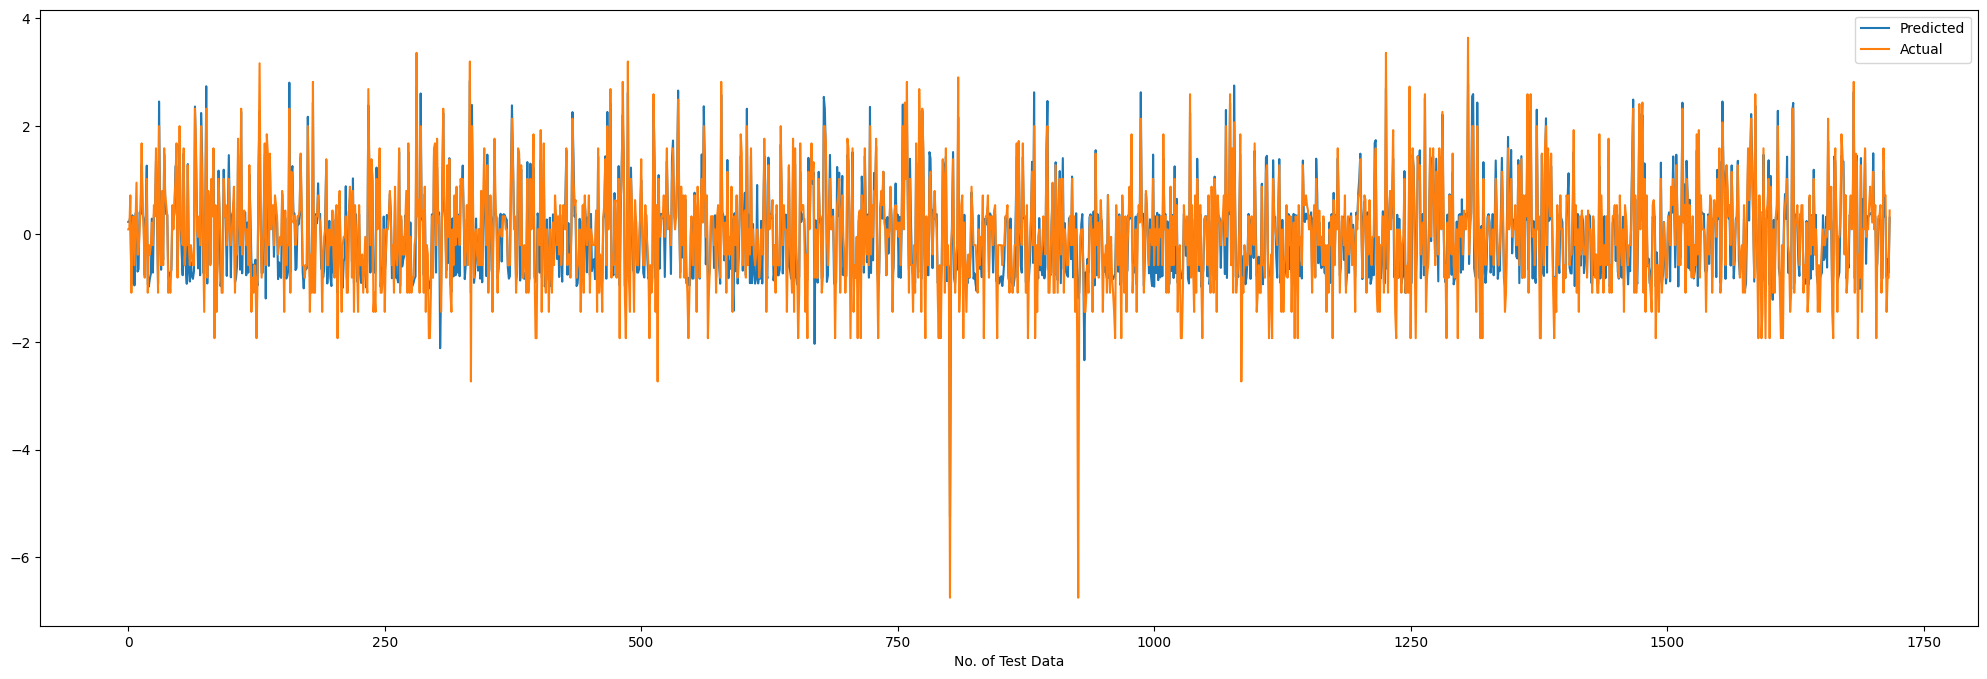

In [136]:
# Plot the figure
plt.figure(figsize=(25,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **`GradientBoostingRegressor with hyperparameter tuning`**

In [132]:
# apply GradientBoostingRegressor algorithm with hyperparameter tuning as step2


# giving parameters
parameters = {
    'n_estimators' :[160],                                                        # 60,100,140,160,180,200,220
    'learning_rate' :[0.05],                                                      # 0.001,0.01,0.05,0.1,1.0
    'max_depth' :[7],                                                             # 4,5,6,7,8
    'max_leaf_nodes' :[8]                                                         # 4,6,8,12,16,20,24,32,None
    #'loss' :['squared_error']                                                    # 'squared_error', 'absolute_error', 'huber'
}

# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gbr = GridSearchCV(GradientBoostingRegressor(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = gbr


# make pipeline
pipe7 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe7.fit(X_train,y_train)

# predict the train and test dataset
y_pred_train = pipe7.predict(X_train)
y_pred = pipe7.predict(X_test)

# display pipeline diagram
display(pipe7)

# GradientBoostingRegressor model all output scores
print('\033[1mTraining data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_train,y_pred_train))
print('Adjusted R2 score', (1-(1-r2_score(y_train,y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))))

print('\n')
print('\033[1mTesting data R2 and Adjusted R2 Score\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('R2 score',r2_score(y_test,y_pred))
print('Adjusted R2 score', (1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))))

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print("The best parameters is", gbr.best_params_)
print('cross-validation score', gbr.best_score_)

print('\n')
print('\033[1mThe performance metrics\033[0m')
print('\033[1m' + '-----------------------------------------' + '\033[0m')
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf', StandardScaler(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf1',
                                                  PowerTransformer(),
                                                  [0, 1, 7, 10]),
                                                 ('col_tnf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3, 4, 5]),
                                                 ('col_tnf3',
                                                  OrdinalEncoder(categories=[['White',
                                                                              'Red',
                                                                              'Orange',
                                                                              'Yellow',
                                                                              'Green',
                                                                              'Dark '
                                                                              'Green']]),
                                                  [8]),
                                                 ('col_tnf4',
                                                  OrdinalE...ies=[['Not '
                                                                              'rated',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Excellent']]),
                                                  [9]),
                                                 ('col_tnf5',
                                                  OrdinalEncoder(categories=[['Cheap',
                                                                              'Moderate',
                                                                              'Expensive',
                                                                              'Very '
                                                                              'Expensive']]),
                                                  [11])])),
                ('step2',
                 GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
                              n_jobs=-1,
                              param_grid={'learning_rate': [0.05],
                                          'max_depth': [7],
                                          'max_leaf_nodes': [8],
                                          'n_estimators': [160]}))])

Training data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8349380414924754
Adjusted R2 score 0.834649092768611


Testing data R2 and Adjusted R2 Score
-----------------------------------------
R2 score 0.8125334844025031
Adjusted R2 score 0.8112140719760104


Cross-validation score and best params
-----------------------------------------
The best parameters is {'learning_rate': 0.05, 'max_depth': 7, 'max_leaf_nodes': 8, 'n_estimators': 160}
cross-validation score 0.8058242429131734


The performance metrics
-----------------------------------------
MAE 0.31477423687878453
MSE 0.1827891763039266
RMSE 0.42753850856259323


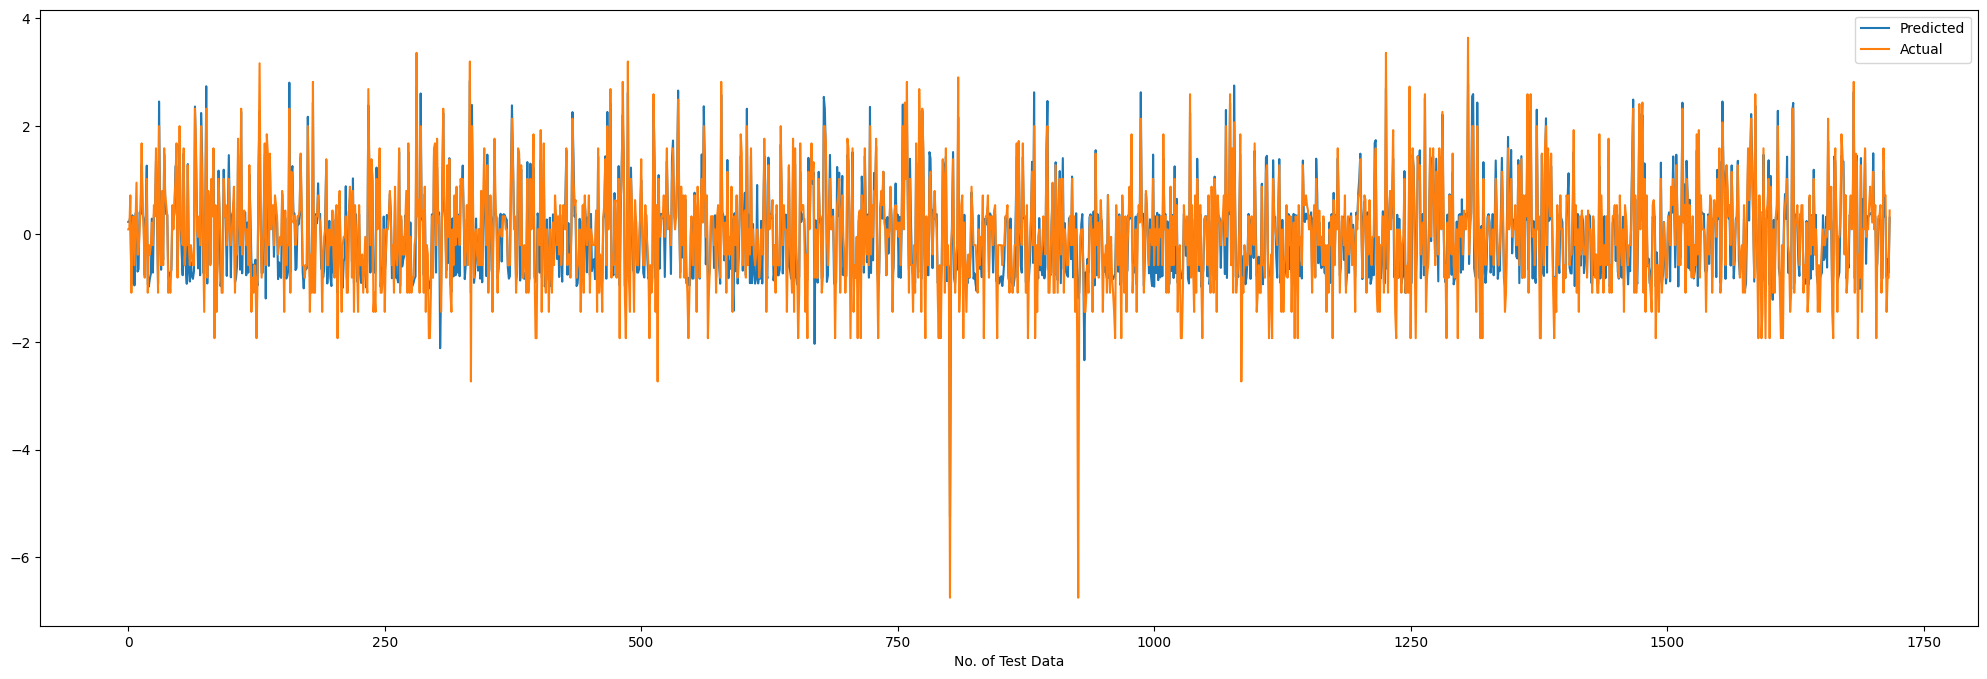

In [137]:
# Plot the figure
plt.figure(figsize=(25,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

# **Conclusion**

## **🥇GradientBoostingRegressor algorithm with hyperparameter🥇**

**`Training data R2 and Adjusted R2 Score`**

*   R2 score 0.83493
*   Adjusted R2 score 0.83464

**`Testing data R2 and Adjusted R2 Score`**

*   R2 score 0.8120
*   Adjusted R2 score 0.8107

**`Cross-validation score`**

*   cross-validation score 0.805

**`The performance metrics`**

*   MAE 0.314
*   MSE 0.183
*   RMSE 0.428








 *At the end a word of Thankyou to you for going through project till the very end, genuinely appreciate your time. Happy Learning!*